## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

sns.set()

## Read the Data

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data_1 = data.drop(['class'],axis = 1)

In [5]:
data_encoded = pd.get_dummies(data , drop_first=True)

### Visualizing the number of mushrooms for each cap categories

In [6]:
'''
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot('cap-shape', hue='class', palette = ['red', 'lightgreen'], saturation=0.6, data=data, dodge=True, ax=ax)
ax.set(title = f"Mushroom {'cap-shape'.title()} Quantity", xlabel=f"{'cap-shape'.title()}", ylabel="Quantity")
ax.set_xticklabels(('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'))
ax.legend(('Poisonous', 'Edible'), loc=0)
'''

'\nfig, ax = plt.subplots(figsize=(15, 7))\nsns.countplot(\'cap-shape\', hue=\'class\', palette = [\'red\', \'lightgreen\'], saturation=0.6, data=data, dodge=True, ax=ax)\nax.set(title = f"Mushroom {\'cap-shape\'.title()} Quantity", xlabel=f"{\'cap-shape\'.title()}", ylabel="Quantity")\nax.set_xticklabels((\'convex\', \'bell\', \'sunken\', \'flat\', \'knobbed\', \'conical\'))\nax.legend((\'Poisonous\', \'Edible\'), loc=0)\n'

In [7]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

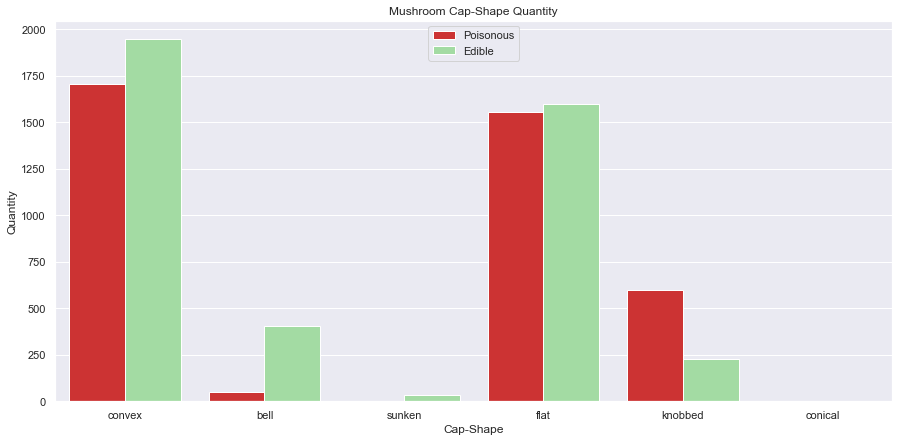

In [8]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

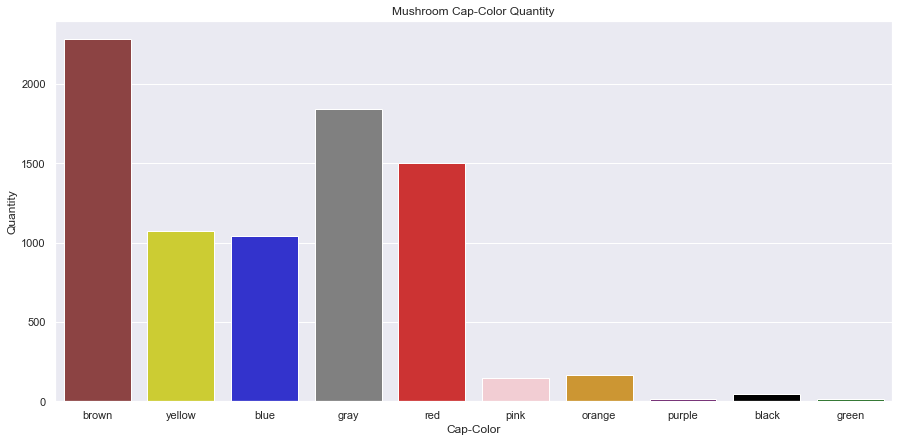

In [9]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

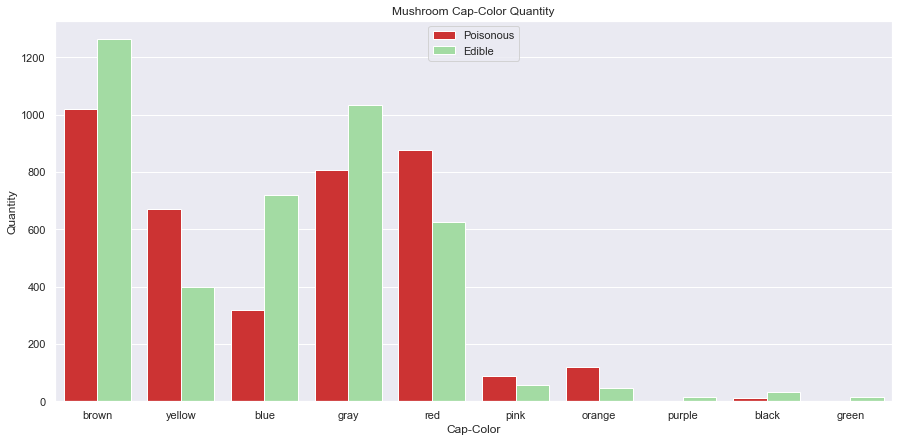

In [10]:
plot_col(col='cap-color', hue='class', labels=color_dict)

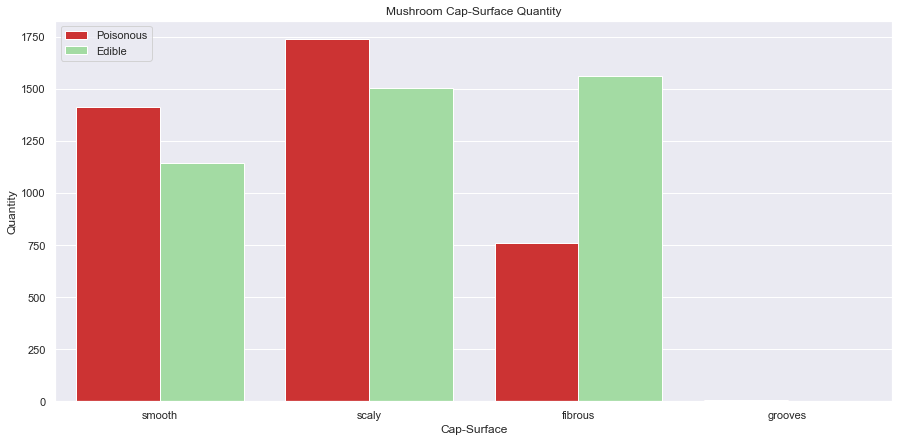

In [11]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

### Plotting the pairwise relationships in a mushrooms for each stalk categories

### Label encoding

In [12]:
data_encode = data.copy()
le = LabelEncoder()
for col in data_encode.columns:
    data_encode[col] = le.fit_transform(data_encode[col]) 
    
data_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
data_cats = data_encode[['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring']]

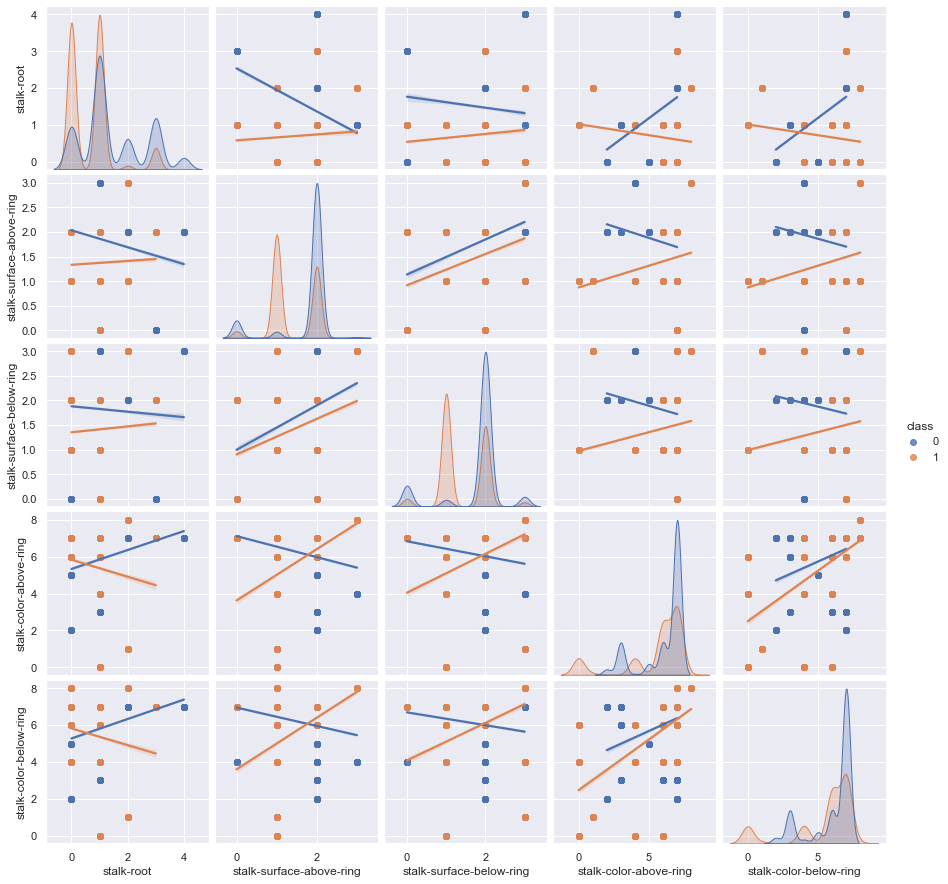

In [14]:
sns.pairplot(data_cats, hue='class', kind='reg')

### Visualizing the distribution in mushrooms for each stalk categories , habitat and population

In [15]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

### **Stalk Category**

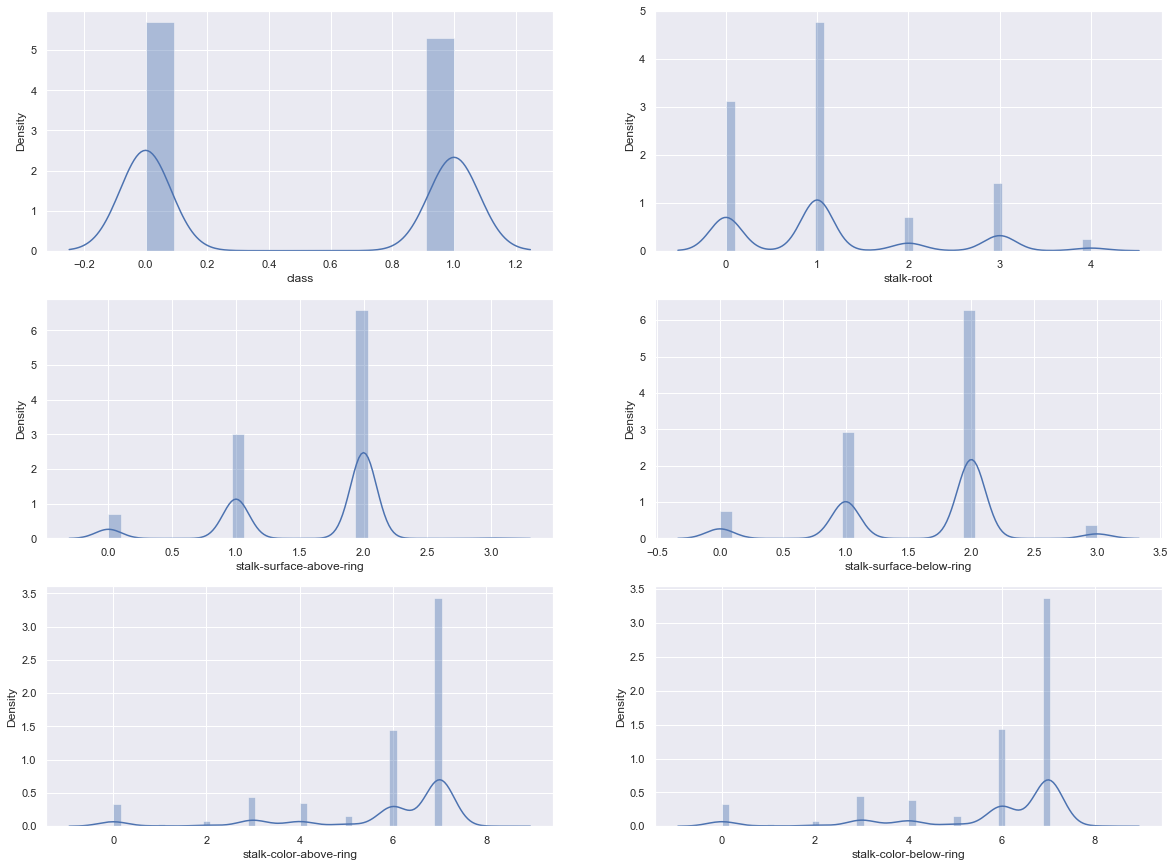

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

### **Habitat**

In [17]:
hab_dict = {"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}

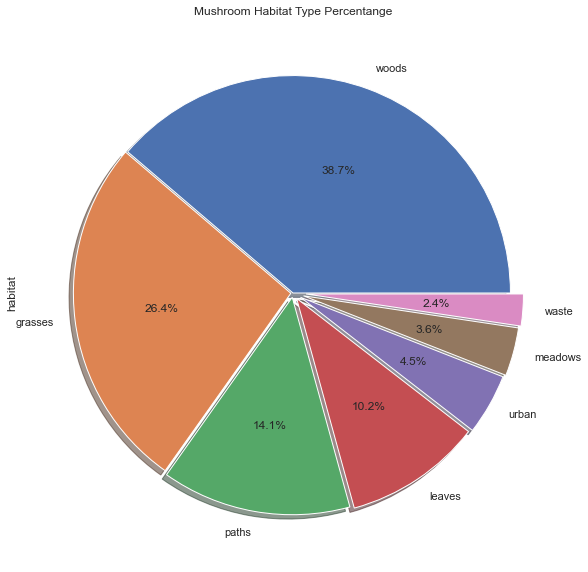

In [18]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['habitat'].value_counts().index)
hab_labels = get_labels(order, hab_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05, 0.06)
data['habitat'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', labels=hab_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

### **Population**

In [19]:
pop_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}

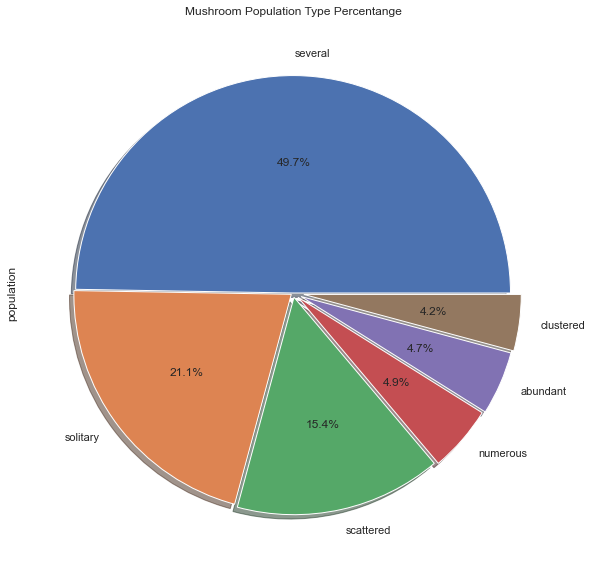

In [20]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['population'].value_counts().index)
pop_labels = get_labels(order, pop_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05)
data['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=pop_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

## Gaussian Naive Classifier 

### 1. Build the Model

### **Min-Max scaler**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(data_encoded)

MinMaxScaler()

In [24]:
scaled_inputs = scaler.fit_transform(data_encoded)

### 2.splitting the data into train & test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(scaled_inputs , data['class'] , test_size=0.2, random_state=42)

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
model = GaussianNB()


In [29]:
model.fit(X_train,y_train)

GaussianNB()

### 3.Accuracy score

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
target_pred = model.predict(X_test)

In [32]:
accuracy_score(y_test , target_pred)

1.0

#### **Classifier resulted 100% accuracy !! That's clearly overfitting!**

## Bernoulli Naive bayes

In [33]:
data_Label_encoded = data.copy()
le=LabelEncoder()
for column in data_Label_encoded.columns:
    data_Label_encoded[column]=le.fit_transform(pd.Series(data_Label_encoded[column]))
x=data_Label_encoded.drop(['class'],axis=1)
y=data_Label_encoded['class'].values

In [34]:
data_with_dummies = pd.get_dummies(x,drop_first=True)

### 1. Build The Model

### **Standard scaler**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()


In [37]:
scaler.fit(data_with_dummies)


StandardScaler()

In [38]:
X = scaler.fit_transform(data_with_dummies)


### 2. splitting the data into train & test data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [41]:
estimators=[]
results=0

estimators.append(('standardize',StandardScaler()))
estimators.append(('naive_bayes',BernoulliNB()))
model=Pipeline(estimators)
seed=1
param_grid=[{'naive_bayes__alpha':[0.0001,0.00001,0.001,0.003,0.01,0.03,0.1,0.3,1]}]
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
grid=GridSearchCV(model,param_grid,cv=kfold,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(accuracy_score(y_test,grid.predict(X_test)))

0.8967498075442648
{'naive_bayes__alpha': 0.0001}
Pipeline(steps=[('standardize', StandardScaler()),
                ('naive_bayes', BernoulliNB(alpha=0.0001))])
0.8953846153846153


In [42]:
model=BernoulliNB(alpha=0.0001)
model.fit(X_train,y_train)

BernoulliNB(alpha=0.0001)

### 3. Accuracy score

In [43]:
y_pred=model.predict(X_test)

In [44]:
print(accuracy_score(y_test,y_pred))

0.8953846153846153


### 4. Roc Score

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test,y_pred)

0.8925072736815598